<img src="https://www.uss.cl/wp-content/themes/uss/img/logo.svg" width="400">

# Universidad San Sebastián - Magister Data Science

## Machine Learning 
### Métodos de Clasificación I
### Marco Cedeño

En este Notebook se va a realizar la explicación y desarrollo de los algoritmos:

* K Vecinos Cercanos (K-NN)

* Naive Bayes

* Árboles de desición 

Cada algoritmo tiene una implementación simple en base a un conjunto de datos pequeño, para luego realizar la aplicación de cada algoritmo sobre un conjunto de datos más extenso.

## 1. K - Vecinos Cercanos (K_NN)

Algoritmo especializado en comparación de estados de los puntos cercanos a una medición con el objetivo de asignar características similares.

**texto en negrita**![image.png](attachment:image.png)

### 1.1 Aplicación sin uso de sklearn api

A continuación se realiza la implementación del algoritmo sin el uso de ninguna api.

#### 1.1.1 Carga de librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import sklearn # se usa solamente para realizar la estandarización
from collections import Counter
from math import sqrt

# código para evitar error de certificado https:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

#### 1.1.2 Carga del conjunto de datos (Iris)

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])


In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 1.1.3 Preprocesamiento de datos

In [5]:
# Selección de valores

X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values

# Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria(80-20 %)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado (estanrarización) para asegurar importancia similar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)       # Datos de prueba estandarizados con los parámetros anteriores

print(X_test[0])

[-0.09544771 -0.58900572  0.72247648  1.51195265]


#### 1.1.4 Definición del modelo K-NN

In [6]:

def knn(X_train, y_train, X_test, k):
    distances = []
    for i in range(len(X_train)):
        distance = sqrt(np.sum(np.square(X_test - X_train[i, :]))) # Distancia euclidea
        distances.append((distance, i)) # añade en la ubicación siguiente
    distances = sorted(distances)
    targets = []
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0] # devuelve el valor más repetido de los vecinos


#### 1.1.5 Predicciones y evaluación del modelo

In [7]:
# Predicciones a partir del conjunto de prueba
y_pred = []
for i in range(len(X_test)):
    y_pred.append(knn(X_train, y_train, X_test[i, :], k=5))

# Evaluación del modelo (Esto se va a revisar más adelante)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


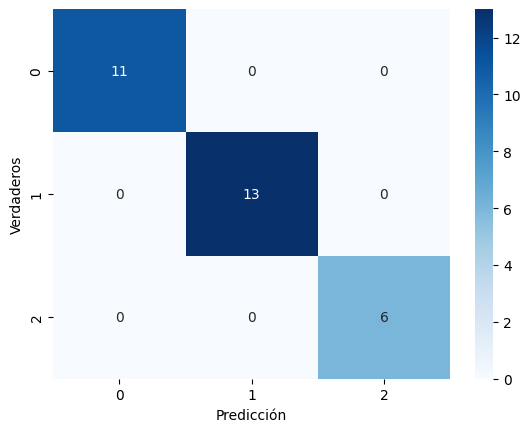

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Verdaderos")
plt.show()

In [9]:
# Comparación manual
Y=pd.DataFrame([y_test,y_pred]).T
Y.columns=(['Prueba','Predicción'])
Y


,Prueba,Predicción
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


*----------------------------------------------------------------------------------------*

#### Librería SKLearn

Revisar el contenido de la librería scikit-learn debido a la gran cantidad de estrategias para ciencia de datos

https://scikit-learn.org/stable/

![Screenshot%202023-04-26%20at%2013.06.23.png](attachment:Screenshot%202023-04-26%20at%2013.06.23.png)

*----------------------------------------------------------------------------------------*

### 1.2 Algoritmo K-NN usando sklearn API 

#### 1.2.1 Carga de librerías necesarias

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

#### 1.2.2 Carga del conjunto de datos (Iris)

In [11]:
data = load_iris()
X = data.data
y = data.target

#### 1.2.3 Preprocesamiento de datos

In [12]:
# Separación de datos para conjunto de entrenamiento y prueba de manera aleatoria(80-20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado (estanrarización) para asegurar importancia similar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores

 #### 1.2.4 Definición del modelo K-NN

In [13]:
# Se crea el modelo con un valor de k=5, similar al ejemplo anterior
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo con los datos correspondientes
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 1.1.5 Predicciones y evaluación del modelo

In [14]:
# Predicciones a partir del conjunto de prueba
y_pred = knn.predict(X_test)

# Evaluación del modelo (Esto se va a revisar más adelante)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## 2. Naive Bayes

En esta y en las restantes metodologías vamos a utilizar los API's generados en la librería de **sklearn**

![image.png](attachment:image.png)

![Screenshot%202023-04-28%20at%2014.44.14.png](attachment:Screenshot%202023-04-28%20at%2014.44.14.png)

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

### Carga de librerías necesarias (API sklearn)

In [15]:
from sklearn.datasets import fetch_20newsgroups # ejemplo de aplicación, conjunto de 18846 correos
from sklearn.feature_extraction.text import TfidfVectorizer # paquete para vectorizar (texto a números) cada correo
from sklearn.naive_bayes import MultinomialNB # API del código Naive Bayes 
from sklearn.metrics import accuracy_score # índices de desempeño (performance)

### Carga del conjunto de datos

In [16]:
# El conjunto de datos ya tiene diferenciado el conjunto de entrenamiento y el de evaluación
# el data set se puede analizar y descargar desde el siguiente link:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
# http://qwone.com/~jason/20Newsgroups/


newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Vemos el primero correo

print(newsgroups_train.data[0],"\n")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 



### Preprocesamiento de datos

In [ ]:
# Se convierten los textos en números con el paquete TF-IDF vectorizer
# Se debe trabajar con los scores de cada palabra para poder obtener las probabilidades.
# 

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Se obtiene una transformación de texto a datos
print(X_train[0].shape)

print(X_train[0])



In [ ]:
# Veamos el primer correo nuevamente y comparemos las categorías del correo

first_email_text = newsgroups_train.data[10]

# Obtenemos los términos más repetidos

first_mail = X_train[10]
sorted_scores = np.argsort(first_mail.toarray())[0][::-1]
feature_names = np.array(list(vectorizer.vocabulary_.keys()))
top_terms = feature_names[sorted_scores[:10]]

# Resultados
print(first_email_text, "\n")

print("categorías del correo:\n")


print(top_terms)



### Definición del modelo

In [ ]:
# Se utiliza el algoritmo miltinomial debido a su ejemplo basado en texto y transformación de datos.
# Cambiando de ejemplo se deberia cambiar de algoritmo que maneje otro tipo de datos.

clf = MultinomialNB() 
clf.fit(X_train, newsgroups_train.target)


### Predicciones y evaluación del modelo

In [ ]:
# Predicción de las categorias de cada correo en el set de prueba

y_pred = clf.predict(X_test)

# Cálculo del porcentaje de exactitud de la predicción del algoritmo
accuracy = accuracy_score(newsgroups_test.target, y_pred)
print("Accuracy:", "{:.2f}".format(accuracy*100),"%")



## 3. Desicion Tree

![image.png](attachment:image.png)

![Screenshot%202023-04-28%20at%2023.22.38.png](attachment:Screenshot%202023-04-28%20at%2023.22.38.png)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Carga de librerías necesarias (API sklearn)

In [ ]:
from sklearn import datasets # el conjunto de datos que posee el API de sklearn son variados
from sklearn.tree import DecisionTreeClassifier # algoritmo de calsificación a utilizar
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Carga del conjunto de datos

In [ ]:
# En este caso se carga un data set correspondiente a datos de mediciones de cáncer de mama
# El dataset contiene 560 mediciones con una dimensionalidad de 30
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

breast_cancer = datasets.load_breast_cancer()

print(breast_cancer.data[0])

### Preprocesamiento de datos

In [ ]:
# Se realiza la separación del conjunto de datos entre prueba y validación con el API de sklearn

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores


### Definición del modelo

In [ ]:
# Con el API, se utiliza el algoritmo para generar el modelo con los datos de entrenamiento
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

### Predicciones y evaluación del modelo

In [ ]:
# Se realiza la predicción de los datos y la evaluación con el índice de performance 

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", "{:.2f}".format(accuracy*100),"%")

## 4. Actividad en clases

In [ ]:
# realizar el código correspondiente a la aplicación de los 3 algoritmos vistos 
# en la clase del día de hoy con el ejemplo siguiente:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Carga de los datos
#digits = datasets.load_digits()

#plt.gray()
#plt.matshow(digits.images[0])
#plt.show()

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

# Estandarizar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Datos de entrenamiento estandarizados
X_test = sc.transform(X_test)        # Datos de prueba estandarizados con los parámetros anteriores


# Clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = round(accuracy_score(y_test, knn_pred) * 100, 2)

# Clasificador Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = round(accuracy_score(y_test, nb_pred) * 100, 2)

# Clasificador Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = round(accuracy_score(y_test, dt_pred) * 100, 2)

# Resultados en una tabla
table = [
    ["KNN", knn_acc],
    ["Naive Bayes", nb_acc],
    ["Decision Tree", dt_acc]
]

headers = ["Algorithm", "Exactitud"]

# Impresión de la tabla
print(tabulate(table, headers, tablefmt="fancy_grid"))